<a href="https://colab.research.google.com/github/suparuek2405/DADS6003_ML/blob/main/Assignment%20week%205/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open the spreadsheet
worksheet = gc.open('สำรวจการใช้ Smartphone (Responses)').sheet1

# Get all values from the spreadsheet
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')
plt.rcParams ['font.family'] = ('Sarabun')
plt.rcParams['font.size']=11
pd.DataFrame.from_records(rows)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเช...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟ...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ...,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อ...,จากข้อที่แล้ว เนื่องจากสาเหตุใด
1,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
2,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
3,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
4,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน
...,...,...,...,...,...,...,...,...,...,...,...,...
65,8/17/2024 15:07:39,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google,เป็นแบรนด์ที่น่าสนใจ
66,8/17/2024 15:08:53,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...
67,8/17/2024 15:09:15,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด
68,8/17/2024 15:24:35,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone,Ecosystem ดี


In [9]:
df = pd.DataFrame.from_records(rows)
df= df.iloc[:, 1:11]
df.columns = df.iloc[0]
df = df[1:]
df

,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด
1,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone
2,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone
3,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone
4,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone
5,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone
...,...,...,...,...,...,...,...,...,...,...
65,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google
66,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone
67,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung
68,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone


In [10]:
df = df[df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'].apply(lambda x: x in ['IOS', 'Android'])]
df

,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด
1,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone
2,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone
3,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone
4,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone
5,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone
...,...,...,...,...,...,...,...,...,...,...
65,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google
66,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone
67,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung
68,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone


In [11]:
df

,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด
1,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone
2,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone
3,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone
4,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone
5,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone
...,...,...,...,...,...,...,...,...,...,...
65,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google
66,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone
67,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung
68,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone


In [12]:
for i in df.columns:
  print(i)
  print(df[i].unique())

เพศของผู้ตอบแบบสอบถาม
['หญิง' 'ชาย']
ช่วงอายุของผู้ตอบแบบสอบถาม
['21-25 ปี' '26-30 ปี' '31-35 ปี' '36-40 ปี']
อาชีพของผู้ตอบแบบสอบถาม
['เอกชน' 'ว่างงาน' 'นักศึกษา' 'รัฐวิสาหกิจ' 'ข้าราชการ' 'Freelancer']
ช่วงเงินเดือนของผู้ตอบแบบสอบถาม
['40,001-50,000 บาท' '30,001-40,000 บาท' 'น้อยกว่า 20,000 บาท'
 '20,001-30,000 บาท' 'มากกว่า 60,000 บาท' '50,001-60,000 บาท']
ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด
['IOS' 'Android']
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]
['บ่อยครั้ง' 'ค่อนข้างน้อย' 'น้อยที่สุด' 'ปานกลาง' 'บ่อยที่สุด']
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]
['บ่อยที่สุด' 'ปานกลาง' 'บ่อยครั้ง' 'ค่อนข้างน้อย' 'น้อยที่สุด']
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]
['ปานกลาง' 'ค่อนข้างน้อย' 'บ่อยที่สุด' 'บ่อยครั้ง' 'น้อยที่สุด']
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]
['ค่อนข้างน้อย' 'ปานกลาง' 'น้อยที่สุด' 'บ่อยครั้ง' 'บ่อยที่สุด']
หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด
['Iphone' 'Samsung' 'Oneplus' 'Oppo' '

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด', axis=1)  # Features
y = df['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(X_train.columns)

# Create a new DataFrame from the encoded data
encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names)

In [37]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_encoded, y_train)

LogisticRegression()

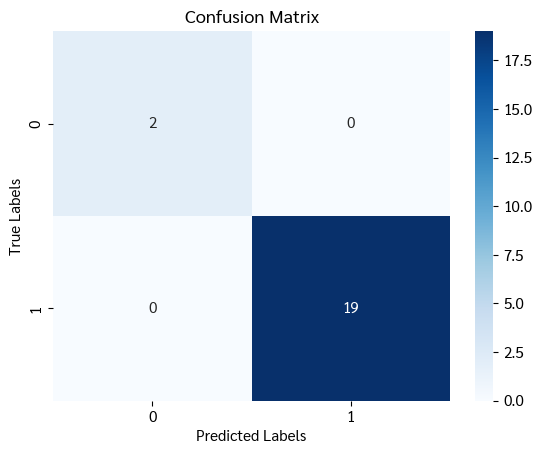

''

In [38]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
;

In [25]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


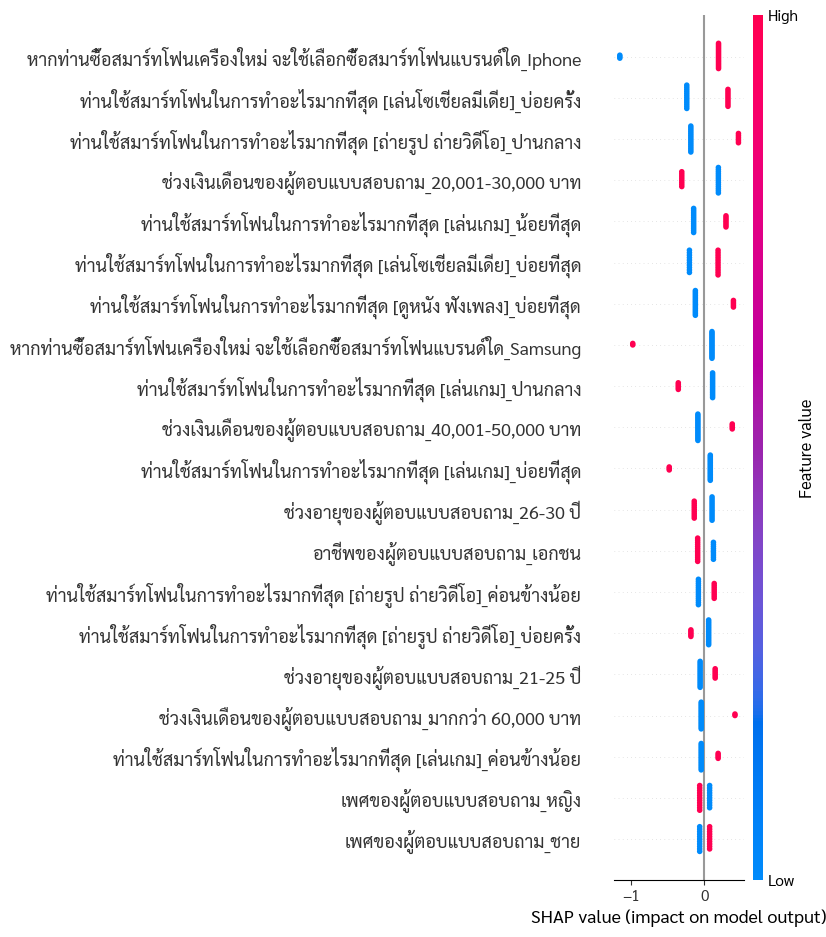

In [39]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(model, X_test_encoded)

# Calculate SHAP values
shap_values = explainer(X_test_encoded)

# Plot the beeswarm plot
shap.summary_plot(shap_values, X_test_encoded, feature_names=feature_names)


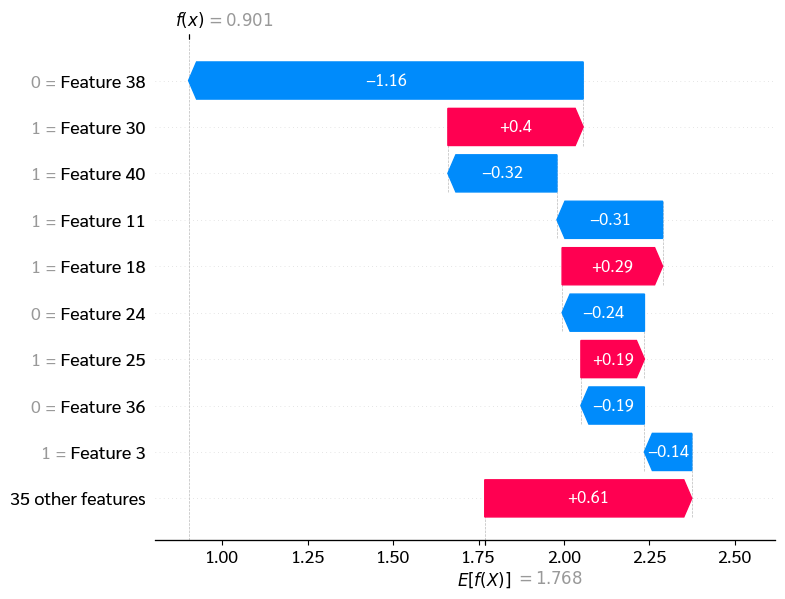

In [71]:
# Select a sample for analysis
sample_index =  20 # Change this to analyze a different sample

# Get the SHAP values for the selected sample
sample_shap_values = shap_values[sample_index, :]

# Plot the SHAP values for the selected sample
shap.plots.waterfall(sample_shap_values)

In [72]:
# prompt: descripe the meaning of previous plot

# The SHAP summary plot provides insights into how each feature contributes to the model's predictions.
# It shows the impact of each feature on the prediction for all instances in the dataset.
# The color represents the SHAP value, indicating the contribution of a feature to the prediction.
# Features with higher absolute SHAP values have a greater impact on the prediction.
# The plot helps identify the most important features and their direction of influence.

# The waterfall plot visualizes the contribution of each feature to a specific prediction.
# It shows how the model arrives at a prediction by summing the SHAP values of each feature.
# This helps understand the factors that influenced the prediction for a specific instance.


In [73]:
for i, feature in enumerate(feature_names):
  print(f"{i+1}: {feature}")


1: เพศของผู้ตอบแบบสอบถาม_ชาย
2: เพศของผู้ตอบแบบสอบถาม_หญิง
3: ช่วงอายุของผู้ตอบแบบสอบถาม_21-25 ปี
4: ช่วงอายุของผู้ตอบแบบสอบถาม_26-30 ปี
5: ช่วงอายุของผู้ตอบแบบสอบถาม_31-35 ปี
6: ช่วงอายุของผู้ตอบแบบสอบถาม_36-40 ปี
7: อาชีพของผู้ตอบแบบสอบถาม_ข้าราชการ
8: อาชีพของผู้ตอบแบบสอบถาม_นักศึกษา
9: อาชีพของผู้ตอบแบบสอบถาม_รัฐวิสาหกิจ
10: อาชีพของผู้ตอบแบบสอบถาม_ว่างงาน
11: อาชีพของผู้ตอบแบบสอบถาม_เอกชน
12: ช่วงเงินเดือนของผู้ตอบแบบสอบถาม_20,001-30,000 บาท
13: ช่วงเงินเดือนของผู้ตอบแบบสอบถาม_30,001-40,000 บาท
14: ช่วงเงินเดือนของผู้ตอบแบบสอบถาม_40,001-50,000 บาท
15: ช่วงเงินเดือนของผู้ตอบแบบสอบถาม_50,001-60,000 บาท
16: ช่วงเงินเดือนของผู้ตอบแบบสอบถาม_น้อยกว่า 20,000 บาท
17: ช่วงเงินเดือนของผู้ตอบแบบสอบถาม_มากกว่า 60,000 บาท
18: ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_ค่อนข้างน้อย
19: ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_น้อยที่สุด
20: ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_บ่อยครั้ง
21: ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]_บ่อยที่สุด
22: ท่านใช้สมาร์ทโฟนในการทำ

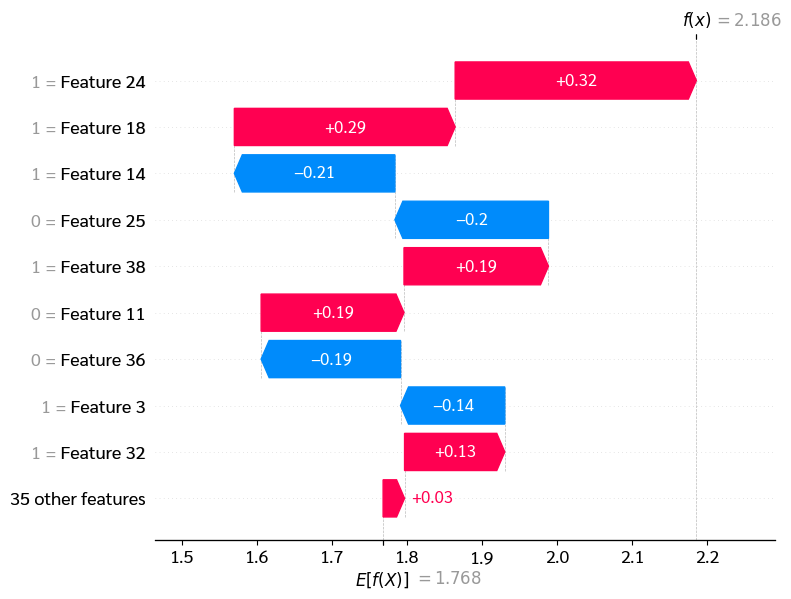

Predicted class for instance 30: IOS


In [76]:
# Select the instance to predict
instance = df.iloc[30]

# Prepare the instance for prediction
instance_df = pd.DataFrame([instance])
instance_encoded = encoder.transform(instance_df.drop('ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด', axis=1))

# Predict the class
prediction = model.predict(instance_encoded)[0]

# Explain the prediction with SHAP
instance_shap_values = explainer(instance_encoded)
shap.plots.waterfall(instance_shap_values[0])

print(f"Predicted class for instance {30}: {prediction}")


In [74]:
df.iloc[30]

,31
0,
เพศของผู้ตอบแบบสอบถาม,ชาย
ช่วงอายุของผู้ตอบแบบสอบถาม,26-30 ปี
อาชีพของผู้ตอบแบบสอบถาม,เอกชน
ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,"50,001-60,000 บาท"
ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,IOS
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],น้อยที่สุด
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],บ่อยครั้ง
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],บ่อยครั้ง
ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],ค่อนข้างน้อย
